$y'=-y+e^t, y(0) = 1\\
y(t) = Ce^{-t} + \frac{e^{t}}{2}\\
y(t) = \frac{e^{-t}}{2}+ \frac{e^{t}}{2}$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [3]:
def y(x):
    return (np.exp(-x) + np.exp(x)) / 2

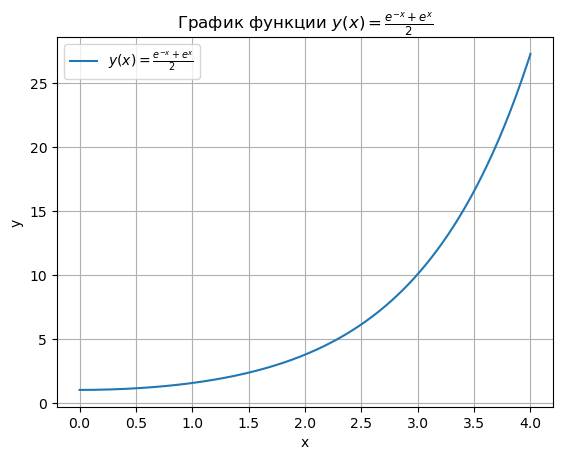

In [38]:
x = np.linspace(0, 4, 400)

y_values = y(x)

plt.plot(x, y_values, label=r'$y(x) = \frac{e^{-x} + e^x}{2}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'График функции $y(x) = \frac{e^{-x} + e^x}{2}$')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
def f(x, y):
    return -y + np.exp(x)


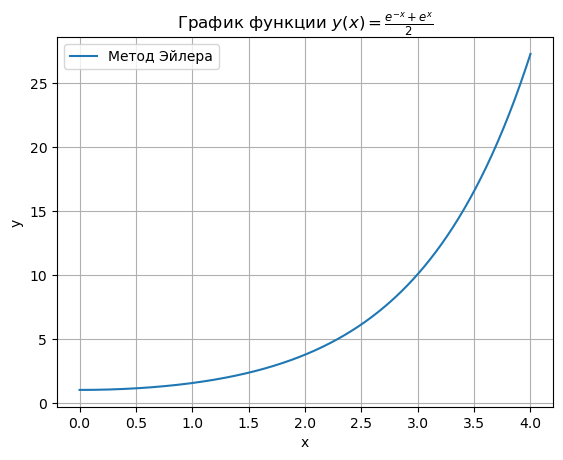

In [32]:
x0 = 0 
y0 = 1 
h = 0.01
x_last = 4

x_values = np.arange(x0, x_last + h, h)
y_euler = np.zeros(len(x_values))
y_euler[0] = y0

for i in range(1, len(x_values)):
    y_euler[i] = y_euler[i-1] + h * f(x_values[i-1], y_euler[i-1])
    
plt.plot(x_values, y_euler, label="Метод Эйлера")
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'График функции $y(x) = \frac{e^{-x} + e^x}{2}$')
plt.legend()
plt.grid(True)
plt.show()

Метод Рунге-Кутта второго порядка точности

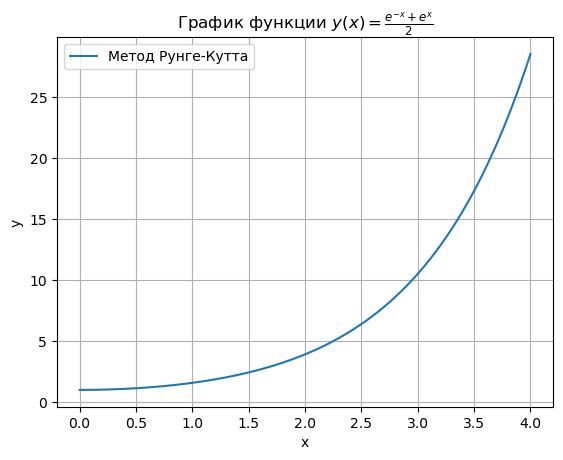

In [62]:
alpha = 0.55
y_runge = np.zeros(len(x_values))
y_runge[0] = y0

for i in range(1, len(x_values)):
    y_runge[i] = y_runge[i-1] + h * ((1 - 1 / (2 * alpha)) * f(x_values[i-1], y_runge[i-1]) +
                                      f(x_values[i-1] + alpha * h, y_runge[i-1] + alpha * h * f(x_values[i-1], y_runge[i-1])))
plt.plot(x_values, y_runge, label="Метод Рунге-Кутта")
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'График функции $y(x) = \frac{e^{-x} + e^x}{2}$')
plt.legend()
plt.grid(True)
plt.show()    

Методы Адамса-Башфорт
Порядок точности 𝑝 = 2

$y_{n+1} = y_{n} + \frac{h}{2} (3f_{n}-f_{n-1})$


In [63]:
y_adams = np.zeros(len(x_values))
y_adams[0] = y0
y_adams[1] = y_adams[0] +  h * f(x_values[0], y_adams[0]) * 3/2
for i in range(2, len(x_values)):
    y_adams[i] = y_adams[i-1] + h * (3 * f(x_values[i-1], y_adams[i-1]) - f(x_values[i-2], y_adams[i-2])) /2
        

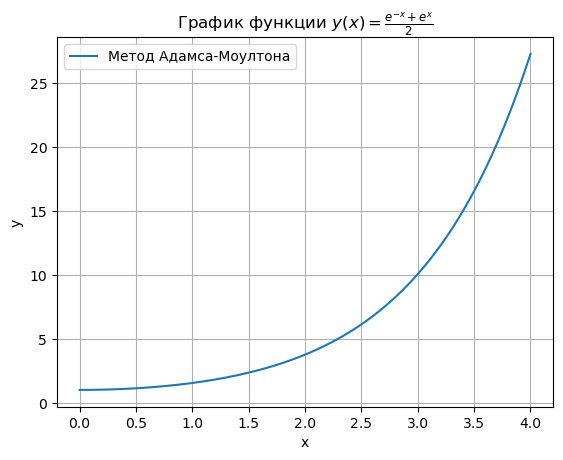

In [64]:
plt.plot(x_values, y_adams, label="Метод Адамса-Моултона")
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'График функции $y(x) = \frac{e^{-x} + e^x}{2}$')
plt.legend()
plt.grid(True)
plt.show()    

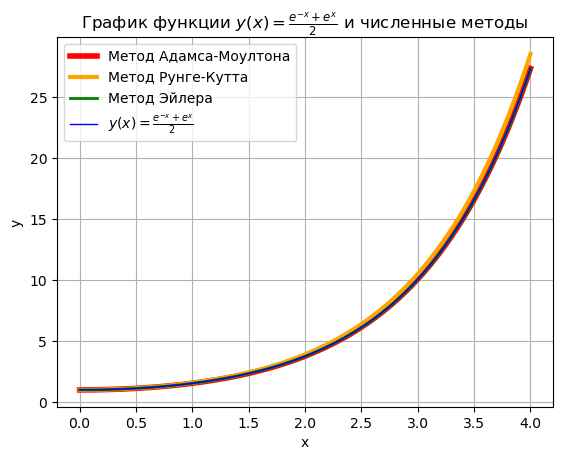

In [68]:
plt.plot(x_values, y_adams, color='red', label="Метод Адамса-Моултона", linewidth=4)
plt.plot(x_values, y_runge, color='orange', label="Метод Рунге-Кутта", linewidth=3)
plt.plot(x_values, y_euler, color='green', label="Метод Эйлера", linewidth=2)
plt.plot(x, y_values, color='blue', label=r'$y(x) = \frac{e^{-x} + e^x}{2}$', linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'График функции $y(x) = \frac{e^{-x} + e^x}{2}$ и численные методы')
plt.legend()
plt.grid(True)
plt.show()